# Import Liraries & Load Data

In [2]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 2. Upload data
data = pd.read_csv("stroke_risk_data.csv")

data.head()


,age,sex,hypertension,heart_disease,smoking_status,bmi,work_type,residence_type,avg_glucose_level,stroke
0,69,Female,0,0,smokes,17.1,Children,Rural,89.2,0
1,32,Female,0,0,formerly smoked,32.2,Self-employed,Urban,116.1,0
2,89,Male,0,0,smokes,25.3,Govt_job,Rural,117.1,0
3,78,Male,0,0,never smoked,27.5,Never_worked,Urban,112.2,0
4,38,Male,0,0,never smoked,29.7,Govt_job,Rural,113.8,0


#  2. Preprocess the Data

In [3]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check for nulls
print(data_encoded.isnull().sum())

# Drop rows with missing values (if any)
data_encoded = data_encoded.dropna()


age                            0
hypertension                   0
heart_disease                  0
bmi                            0
avg_glucose_level              0
stroke                         0
sex_Male                       0
smoking_status_never smoked    0
smoking_status_smokes          0
work_type_Govt_job             0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
residence_type_Urban           0
dtype: int64


# 3. Train/Test Split

In [4]:
# Split features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((400, 13), (100, 13))

# 4. Build & Train Logistic Regression Model

In [5]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]


# 5. Evaluate the Model

In [6]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC
roc_score = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_score:.2f}")


Confusion Matrix:
[[78  7]
 [10  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.42      0.33      0.37        15

    accuracy                           0.83       100
   macro avg       0.65      0.63      0.64       100
weighted avg       0.82      0.83      0.82       100

ROC AUC Score: 0.81


# 6. Visualize ROC Curve

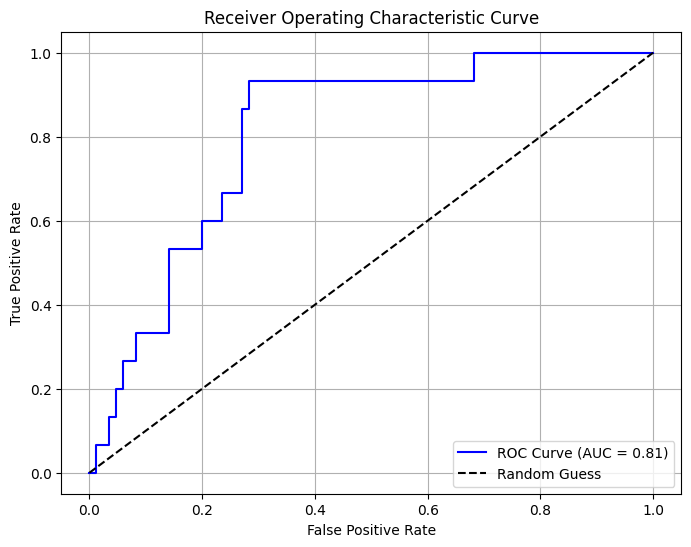

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid(True)
plt.show()


# 7. Feature Importance



/tmp/ipython-input-8-848991726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


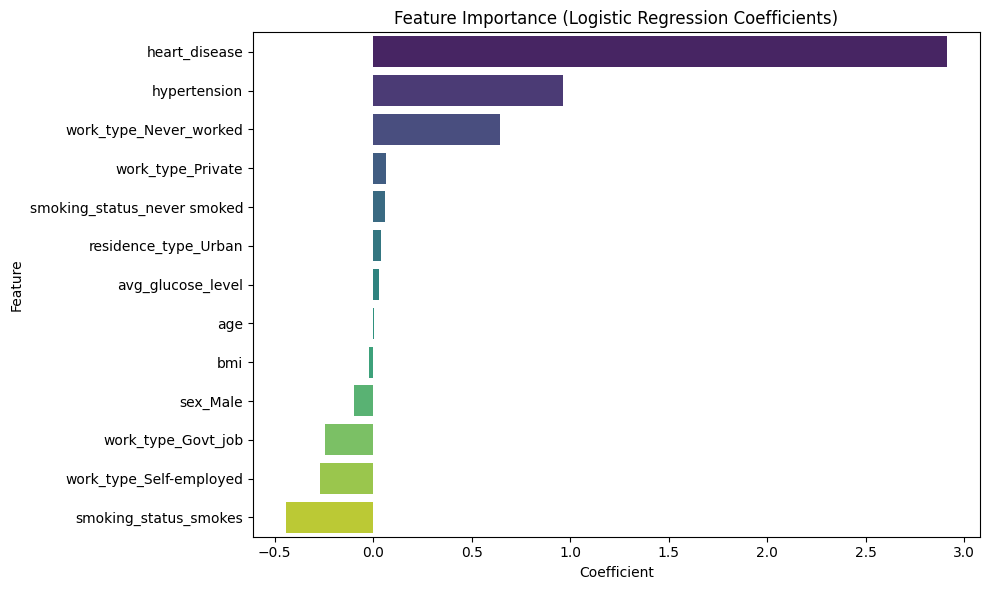

In [8]:
# Feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()
